In [ ]:
## Final Project Submission

Please fill out:
* Student name: Beatrice Cherotich Kirui
* Student pace: full time
* Scheduled project review date/time: 12/03/2023
* Instructor name: William Okomba
* Blog post URL:


In [ ]:
# Your code here - remember to use markdown cells for comments as well!

IMPORT RELEVANT LIBRARIES

In [197]:
import pandas as pd
import sqlite3
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy
%matplotlib inline
#cur = conn.cursor()

LOADING AND UNDERSTANDING bom_movie_gross DATA

In [198]:
bom_movie_df = pd.read_csv("bom.movie_gross.csv")
bom_movie_df


,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010
...,...,...,...,...,...
3382,The Quake,Magn.,6200.0,NaN,2018
3383,Edward II (2018 re-release),FM,4800.0,NaN,2018
3384,El Pacto,Sony,2500.0,NaN,2018
3385,The Swan,Synergetic,2400.0,NaN,2018


In [199]:
bom_movie_df.head(10)

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010
5,The Twilight Saga: Eclipse,Sum.,300500000.0,398000000,2010
6,Iron Man 2,Par.,312400000.0,311500000,2010
7,Tangled,BV,200800000.0,391000000,2010
8,Despicable Me,Uni.,251500000.0,291600000,2010
9,How to Train Your Dragon,P/DW,217600000.0,277300000,2010


In [200]:
bom_movie_df.tail(10)

,title,studio,domestic_gross,foreign_gross,year
3377,Let Yourself Go,Men.,12200.0,NaN,2018
3378,Hannah (2018),PDF,11700.0,NaN,2018
3379,Souvenir,Strand,11400.0,NaN,2018
3380,Furious (Legend of Kolovrat),CARUSEL,10000.0,NaN,2018
3381,Beauty and the Dogs,Osci.,8900.0,NaN,2018
3382,The Quake,Magn.,6200.0,NaN,2018
3383,Edward II (2018 re-release),FM,4800.0,NaN,2018
3384,El Pacto,Sony,2500.0,NaN,2018
3385,The Swan,Synergetic,2400.0,NaN,2018
3386,An Actor Prepares,Grav.,1700.0,NaN,2018


In [201]:
bom_movie_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


In [202]:
bom_movie_df.describe()

,domestic_gross,year
count,3.359000e+03,3387.000000
mean,2.874585e+07,2013.958075
std,6.698250e+07,2.478141
min,1.000000e+02,2010.000000
25%,1.200000e+05,2012.000000
50%,1.400000e+06,2014.000000
75%,2.790000e+07,2016.000000
max,9.367000e+08,2018.000000


DATA CLEANING OF bom_movie_df 

REMOVING DUPLICATES 

In [203]:
def identify_duplicates(data):
    """Simple function to identify any duplicates"""
    duplicates = []
    for i in data.duplicated():
        duplicates.append(i)
    # identify if there is any duplicates. (If there is any we expect a True value in the list duplicates)
    duplicates_set = set(duplicates) 
    if (len(duplicates_set) == 1):
        print("The Data has no duplicates")
    else:
        no_true = 0
        for val in duplicates:
            if (val == True):
                no_true += 1
        # percentage of the data represented by duplicates 
        duplicates_percentage = np.round(((no_true / len(data)) * 100), 3)
        print(f"The Data has {no_true} duplicated rows.\nThis constitutes {duplicates_percentage}% of the data set.") 



identify_duplicates(bom_movie_df)

The Data has no duplicates


MISSING VALUES

In [ ]:
#check for missing values

In [204]:
def identify_missing_values(data):
    """Identify is the data has missing values"""
    # identify if data has missing values(data.isnull().any())
    # empty dict to store missing values
    missing = []
    for i in data.isnull().any():
        # add the bool values to empty list 
        missing.append(i)
    # covert list to set (if data has missing value, the list should have true and false)
    missing_set = set(missing)
    if (len(missing_set) == 1):
        out = print("The Data has no missing values")
    else:
        out = print("The Data has missing values.")

    return out


identify_missing_values(bom_movie_df)

The Data has missing values.


In [ ]:
#identify the missing values

In [205]:
def missing_values(data):
    """A simple function to identify data has missing values""" 
    miss = data.isnull().sum().sort_values(ascending = False)

    percentage_miss = (data.isnull().sum() / len(data)).sort_values(ascending = False)

    missing = pd.DataFrame({"Missing Values": miss, "Percentage(%)": percentage_miss})
   
    return missing


missing_data = missing_values(bom_movie_df)
missing_data

,Missing Values,Percentage(%)
foreign_gross,1350,0.398583
domestic_gross,28,0.008267
studio,5,0.001476
year,0,0.000000
title,0,0.000000


In [15]:
# 39 % missing in foreign gross therefore instead of removing the foreign_gross column we will drop rows that have missing values

In [206]:
bom_movie_df = bom_movie_df.dropna(axis = 0, how ='any')
bom_movie_df

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010
...,...,...,...,...,...
3275,I Still See You,LGF,1400.0,1500000,2018
3286,The Catcher Was a Spy,IFC,725000.0,229000,2018
3309,Time Freak,Grindstone,10000.0,256000,2018
3342,Reign of Judges: Title of Liberty - Concept Short,Darin Southa,93200.0,5200,2018


In [207]:
bom_movie_df.describe()

,domestic_gross,year
count,2.007000e+03,2007.000000
mean,4.701984e+07,2013.506228
std,8.162689e+07,2.597997
min,4.000000e+02,2010.000000
25%,6.700000e+05,2011.000000
50%,1.670000e+07,2013.000000
75%,5.605000e+07,2016.000000
max,9.367000e+08,2018.000000


FIXING STRUCTURAL ISSUES

In [208]:
bom_movie_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2007 entries, 0 to 3353
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           2007 non-null   object 
 1   studio          2007 non-null   object 
 2   domestic_gross  2007 non-null   float64
 3   foreign_gross   2007 non-null   object 
 4   year            2007 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 94.1+ KB


In [ ]:
#row where foreign gross is a float

In [209]:
row = bom_movie_df.iloc[1275]
row

title             Star Wars: The Force Awakens
studio                                      BV
domestic_gross                       9.367e+08
foreign_gross                          1,131.6
year                                      2015
Name: 1872, dtype: object

In [33]:
# converting forein_gross from string to float except row in index 1275 where it is a float

In [210]:
bom_movie_df['foreign_gross'] =pd.to_numeric(bom_movie_df['foreign_gross'], downcast= 'float', errors = 'coerce')
bom_movie_df

<ipython-input-210-7d30b9928f4d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bom_movie_df['foreign_gross'] =pd.to_numeric(bom_movie_df['foreign_gross'], downcast= 'float', errors = 'coerce')


,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000.0,2010
1,Alice in Wonderland (2010),BV,334200000.0,691299968.0,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300032.0,2010
3,Inception,WB,292600000.0,535700000.0,2010
4,Shrek Forever After,P/DW,238700000.0,513900000.0,2010
...,...,...,...,...,...
3275,I Still See You,LGF,1400.0,1500000.0,2018
3286,The Catcher Was a Spy,IFC,725000.0,229000.0,2018
3309,Time Freak,Grindstone,10000.0,256000.0,2018
3342,Reign of Judges: Title of Liberty - Concept Short,Darin Southa,93200.0,5200.0,2018


In [211]:
bom_movie_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2007 entries, 0 to 3353
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           2007 non-null   object 
 1   studio          2007 non-null   object 
 2   domestic_gross  2007 non-null   float64
 3   foreign_gross   2002 non-null   float32
 4   year            2007 non-null   int64  
dtypes: float32(1), float64(1), int64(1), object(2)
memory usage: 86.2+ KB


In [ ]:
# values in domestic_gross and foreign_gross are now floats

IDENTIFY OUTLIERS

In [ ]:
#Using IQR  for domestic_gross and foreign_gross respectively

In [212]:
def IQR_outliers(data, column):
    """Simple function to identify and remove outliers using IQR"""
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    # calculate IQR
    IQR = Q3-Q1
    # identify ouliers (returns True if an outlier)
    out = ((data[column]<(Q1-1.5*IQR)) | (data[column]>(Q3+1.5*IQR)))

    # identify the outlier using index
    outliers_list = list(out[out==True].index)
    # identify the actual outliers using index
    outliers = []
    for val in outliers_list:
        outliers.append(data[column][val])

    
    return outliers, Q1, Q3, IQR


bom_outliers = IQR_outliers(bom_movie_df, "domestic_gross")
bom_outliers[0]

[415000000.0,
 334200000.0,
 296000000.0,
 292600000.0,
 238700000.0,
 300500000.0,
 312400000.0,
 200800000.0,
 251500000.0,
 217600000.0,
 163200000.0,
 172100000.0,
 176600000.0,
 148400000.0,
 148400000.0,
 162000000.0,
 171200000.0,
 381000000.0,
 352400000.0,
 241100000.0,
 281300000.0,
 209400000.0,
 165200000.0,
 209800000.0,
 254500000.0,
 142600000.0,
 191500000.0,
 149300000.0,
 186800000.0,
 143600000.0,
 176800000.0,
 181000000.0,
 176700000.0,
 146400000.0,
 169100000.0,
 169700000.0,
 623400000.0,
 304400000.0,
 448100000.0,
 303000000.0,
 161300000.0,
 292300000.0,
 262000000.0,
 216400000.0,
 408000000.0,
 179000000.0,
 218800000.0,
 237300000.0,
 189400000.0,
 148800000.0,
 162800000.0,
 155300000.0,
 139900000.0,
 148300000.0,
 214000000.0,
 182200000.0,
 400700000.0,
 409000000.0,
 368100000.0,
 258399999.0,
 424700000.0,
 238700000.0,
 268500000.0,
 274100000.0,
 291000000.0,
 206400000.0,
 187200000.0,
 202400000.0,
 234900000.0,
 228800000.0,
 144800000.0,
 15040

In [213]:
bom_outliers = IQR_outliers(bom_movie_df, "foreign_gross")
bom_outliers[0]

[652000000.0,
 691300000.0,
 664300000.0,
 535700000.0,
 513900000.0,
 398000000.0,
 311500000.0,
 391000000.0,
 291600000.0,
 277300000.0,
 330000000.0,
 311300000.0,
 275400000.0,
 228000000.0,
 245600000.0,
 222400000.0,
 216400000.0,
 187900000.0,
 240100000.0,
 193000000.0,
 210700000.0,
 185500000.0,
 194600000.0,
 960500000.0,
 771400000.0,
 804600000.0,
 430900000.0,
 485300000.0,
 500400000.0,
 416300000.0,
 332300000.0,
 421100000.0,
 370700000.0,
 405700000.0,
 358600000.0,
 341000000.0,
 305000000.0,
 268300000.0,
 296400000.0,
 193900000.0,
 207200000.0,
 209600000.0,
 213800000.0,
 895500000.0,
 804200000.0,
 636800000.0,
 718100000.0,
 715900000.0,
 537400000.0,
 495900000.0,
 530500000.0,
 286400000.0,
 445000000.0,
 484000000.0,
 330600000.0,
 303200000.0,
 281800000.0,
 293000000.0,
 416400000.0,
 262600000.0,
 276900000.0,
 241300000.0,
 236300000.0,
 210100000.0,
 285700000.0,
 231400000.0,
 229900000.0,
 203500000.0,
 221600000.0,
 237600000.0,
 211100000.0,
 19770

In [ ]:
#As much as the above are identified as outliers they are genuine and therefore we won't drop them

In [ ]:
CLEAN bom_movie_gross DATA

In [214]:
# reset the index
bom_movie_df.reset_index(drop= True, inplace=True)

In [215]:
bom_movie_df.head(10)

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000.0,2010
1,Alice in Wonderland (2010),BV,334200000.0,691299968.0,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300032.0,2010
3,Inception,WB,292600000.0,535700000.0,2010
4,Shrek Forever After,P/DW,238700000.0,513900000.0,2010
5,The Twilight Saga: Eclipse,Sum.,300500000.0,398000000.0,2010
6,Iron Man 2,Par.,312400000.0,311500000.0,2010
7,Tangled,BV,200800000.0,391000000.0,2010
8,Despicable Me,Uni.,251500000.0,291600000.0,2010
9,How to Train Your Dragon,P/DW,217600000.0,277300000.0,2010


In [ ]:
EXPLORATORY DATA ANALYSIS OF CLEANED bom_movie_gross

In [ ]:
ARE THE MOVIES PROFITABLE?

In [216]:
bom_movie_df[['domestic_gross', 'year']]

,domestic_gross,year
0,415000000.0,2010
1,334200000.0,2010
2,296000000.0,2010
3,292600000.0,2010
4,238700000.0,2010
...,...,...
2002,1400.0,2018
2003,725000.0,2018
2004,10000.0,2018
2005,93200.0,2018


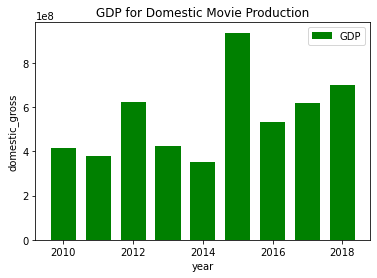

In [217]:

plt.bar(x , y, color= 'g', width =0.72, label ='GDP')
plt.xlabel('year')
plt.ylabel('domestic_gross')
plt.title('GDP for Domestic Movie Production')
plt.legend()
plt.show()

In [ ]:
Highest domestic_gross from 2015 movies seen from the plot above.

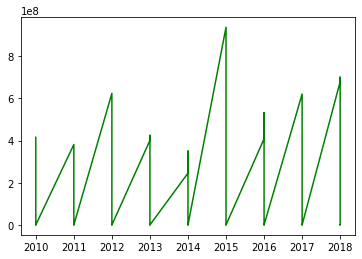

In [218]:
fig, ax = plt.subplots()

x = bom_movie_df['year']
y = bom_movie_df['domestic_gross']
ax.plot(x, y, 'g');

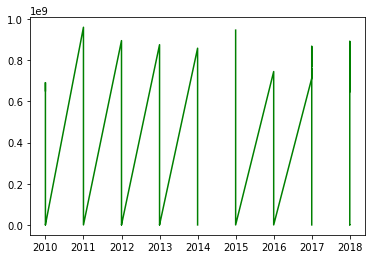

In [219]:
fig, ax = plt.subplots()

x = bom_movie_df['year']
y = bom_movie_df['foreign_gross']
ax.plot(x, y, 'g');

''

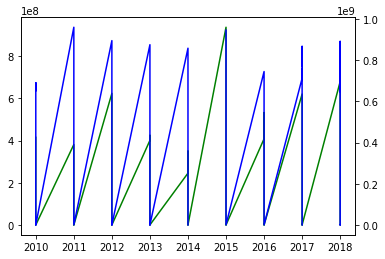

In [220]:
fig, ax1 = plt.subplots()

x = bom_movie_df['year']
y1 = bom_movie_df['domestic_gross']
y2 = bom_movie_df['foreign_gross']

ax2 = ax1.twinx()

ax1.plot(x, y1, 'g')
ax2.plot(x, y2, 'b')
;

Foreign_gross income greater than that of domestic_gross as seen from the above plot

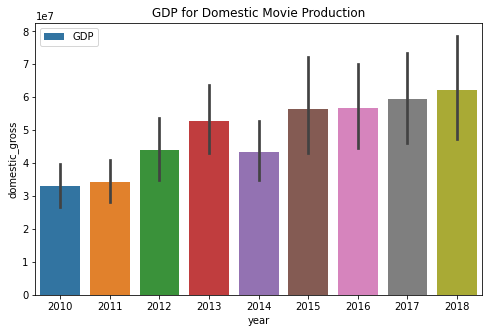

In [221]:
plt.subplots(figsize = (8,5))
sns.barplot(x= bom_movie_df['year'], y= bom_movie_df['domestic_gross'], data =bom_movie_df, label = 'GDP')
plt.title('GDP for Domestic Movie Production')
plt.legend();

More domestic_gross frome movies produced in 2018

In [135]:
bom_movie_df.loc()

In [ ]:
CONNECTING TO IM.DB DATABASE

In [222]:
conn =sqlite3.connect('im.db')

VIEWING THE LIST OF TABLES

In [223]:
table_name = """SELECT name
                       AS 'Table Names'
                       FROM sqlite_master
                       WHERE type='table';
                    """
pd.read_sql(table_name, conn)

,Table Names
0,movie_basics
1,directors
2,known_for
3,movie_akas
4,movie_ratings
5,persons
6,principals
7,writers


SELECTING DATA FROM MOVIE_BASICS TABLE

In [224]:
first_query = """SELECT *
                       FROM movie_basics;
                    """
pd.read_sql(first_query, conn).head(10)

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"
5,tt0111414,A Thin Life,A Thin Life,2018,75.0,Comedy
6,tt0112502,Bigfoot,Bigfoot,2017,NaN,"Horror,Thriller"
7,tt0137204,Joe Finds Grace,Joe Finds Grace,2017,83.0,"Adventure,Animation,Comedy"
8,tt0139613,O Silêncio,O Silêncio,2012,NaN,"Documentary,History"
9,tt0144449,Nema aviona za Zagreb,Nema aviona za Zagreb,2012,82.0,Biography


In [225]:
first_query = """SELECT *
                       FROM movie_basics;
                    """
pd.read_sql(first_query, conn).tail(10)

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
146134,tt9916160,Drømmeland,Drømmeland,2019,72.0,Documentary
146135,tt9916170,The Rehearsal,O Ensaio,2019,51.0,Drama
146136,tt9916186,Illenau - die Geschichte einer ehemaligen Heil...,Illenau - die Geschichte einer ehemaligen Heil...,2017,84.0,Documentary
146137,tt9916190,Safeguard,Safeguard,2019,90.0,"Drama,Thriller"
146138,tt9916428,The Secret of China,The Secret of China,2019,NaN,"Adventure,History,War"
146139,tt9916538,Kuambil Lagi Hatiku,Kuambil Lagi Hatiku,2019,123.0,Drama
146140,tt9916622,Rodolpho Teóphilo - O Legado de um Pioneiro,Rodolpho Teóphilo - O Legado de um Pioneiro,2015,NaN,Documentary
146141,tt9916706,Dankyavar Danka,Dankyavar Danka,2013,NaN,Comedy
146142,tt9916730,6 Gunn,6 Gunn,2017,116.0,None
146143,tt9916754,Chico Albuquerque - Revelações,Chico Albuquerque - Revelações,2013,NaN,Documentary


DATAFRAME FROM THE MOVIE_BASICS SQL TABLE

In [226]:
movie_basics_df = pd.read_sql_query(first_query, conn)
movie_basics_df

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"
...,...,...,...,...,...,...
146139,tt9916538,Kuambil Lagi Hatiku,Kuambil Lagi Hatiku,2019,123.0,Drama
146140,tt9916622,Rodolpho Teóphilo - O Legado de um Pioneiro,Rodolpho Teóphilo - O Legado de um Pioneiro,2015,NaN,Documentary
146141,tt9916706,Dankyavar Danka,Dankyavar Danka,2013,NaN,Comedy
146142,tt9916730,6 Gunn,6 Gunn,2017,116.0,None


In [227]:
movie_basics_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146144 entries, 0 to 146143
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   movie_id         146144 non-null  object 
 1   primary_title    146144 non-null  object 
 2   original_title   146123 non-null  object 
 3   start_year       146144 non-null  int64  
 4   runtime_minutes  114405 non-null  float64
 5   genres           140736 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 6.7+ MB


DATA CLEANING OF THE MOVIE_BASICS DATAFRAME

In [ ]:
CHECKING FOR MISSING VALUES AND REMOVING THEM

In [228]:
identify_missing_values(movie_basics_df)

The Data has missing values.


In [229]:
movie_basics_df = movie_basics_df.dropna(axis = 0, how ='any')
movie_basics_df

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"
5,tt0111414,A Thin Life,A Thin Life,2018,75.0,Comedy
...,...,...,...,...,...,...
146134,tt9916160,Drømmeland,Drømmeland,2019,72.0,Documentary
146135,tt9916170,The Rehearsal,O Ensaio,2019,51.0,Drama
146136,tt9916186,Illenau - die Geschichte einer ehemaligen Heil...,Illenau - die Geschichte einer ehemaligen Heil...,2017,84.0,Documentary
146137,tt9916190,Safeguard,Safeguard,2019,90.0,"Drama,Thriller"


In [230]:
movie_basics_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 112232 entries, 0 to 146139
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   movie_id         112232 non-null  object 
 1   primary_title    112232 non-null  object 
 2   original_title   112232 non-null  object 
 3   start_year       112232 non-null  int64  
 4   runtime_minutes  112232 non-null  float64
 5   genres           112232 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 6.0+ MB


In [ ]:
#confrming the missing values have been removed

In [231]:
identify_missing_values(movie_basics_df)

The Data has no missing values


CHECKING FOR DUPLICATES

In [232]:
identify_duplicates(movie_basics_df)

The Data has no duplicates


EXPLORATORY DATA ANALYSIS OF THE movie_basics DATAFRAME

In [233]:
#the genres column
genres_count= dict(movie_basics_df['genres'].value_counts().head(10))
genres_count


{'Documentary': 24672,
 'Drama': 15725,
 'Comedy': 6413,
 'Comedy,Drama': 3163,
 'Horror': 2975,
 'Biography,Documentary': 2052,
 'Thriller': 1924,
 'Drama,Romance': 1806,
 'Documentary,Drama': 1515,
 'Comedy,Drama,Romance': 1451}

In [234]:
genres_count.keys()

dict_keys(['Documentary', 'Drama', 'Comedy', 'Comedy,Drama', 'Horror', 'Biography,Documentary', 'Thriller', 'Drama,Romance', 'Documentary,Drama', 'Comedy,Drama,Romance'])

In [235]:
Number = genres_count.values()
Number

dict_values([24672, 15725, 6413, 3163, 2975, 2052, 1924, 1806, 1515, 1451])

In [236]:
genres_count_list = list(genres_count.keys())
genres_count_list

['Documentary',
 'Drama',
 'Comedy',
 'Comedy,Drama',
 'Horror',
 'Biography,Documentary',
 'Thriller',
 'Drama,Romance',
 'Documentary,Drama',
 'Comedy,Drama,Romance']

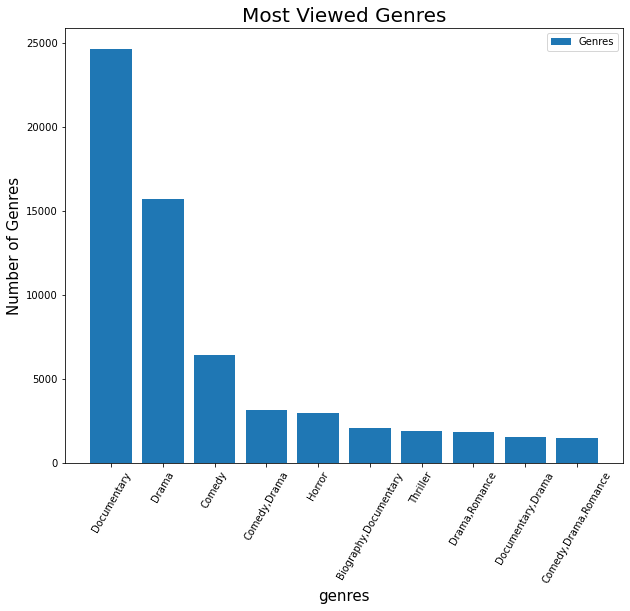

In [237]:
genres_count_figure, ax = plt.subplots(figsize=(10, 8))
plt.bar( x=genres_count_list, height= Number, label = 'Genres')
plt.xlabel('genres', fontdict={'color':'black', 'size':15})
plt.xticks(rotation = '60')
plt.ylabel('Number of Genres',fontdict={'color':'black', 'size':15})
plt.title('Most Viewed Genres', fontsize =20)
plt.legend()
plt.show();

Documentaries are the most viewed genres whereas 'Comedy,Drama,Romance' is the least watched

In [238]:
#the runtime_minutes column
runtime_count= dict(movie_basics_df['runtime_minutes'].value_counts().head(10))
runtime_count


{90.0: 7050,
 80.0: 3460,
 85.0: 2882,
 100.0: 2635,
 95.0: 2518,
 75.0: 2458,
 60.0: 2336,
 88.0: 2049,
 93.0: 2047,
 52.0: 1998}

In [239]:
runtime = runtime_count.keys()
runtime

dict_keys([90.0, 80.0, 85.0, 100.0, 95.0, 75.0, 60.0, 88.0, 93.0, 52.0])

In [240]:
runtime_count_list = list(runtime_count.keys())
runtime_count_list

[90.0, 80.0, 85.0, 100.0, 95.0, 75.0, 60.0, 88.0, 93.0, 52.0]

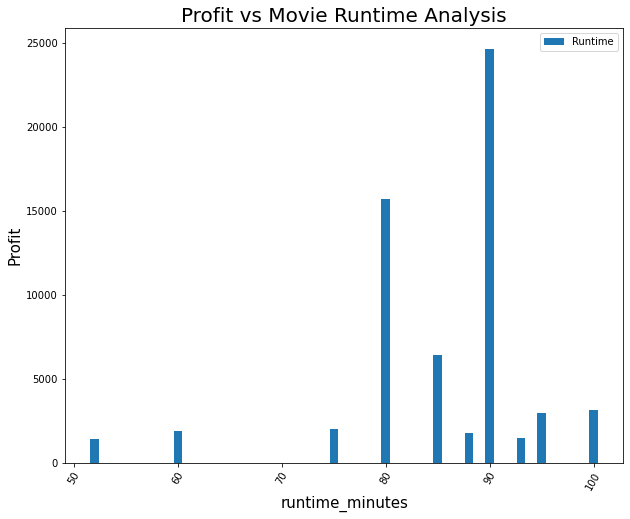

In [241]:
runtime_count_figure, ax = plt.subplots(figsize=(10, 8))
plt.bar( x=runtime_count_list, height= Number, label = 'Runtime')
plt.xlabel('runtime_minutes', fontdict={'color':'black', 'size':15})
plt.xticks(rotation = '60')
plt.ylabel('Profit',fontdict={'color':'black', 'size':15})
plt.title('Profit vs Movie Runtime Analysis', fontsize =20)
plt.legend()
plt.show();

Movies that run for 90 minutes are more profitable as they are the most watched

In [ ]:
SELECTING DATA FROM MOVIE_RATINGS TABLE

In [242]:
second_query = """SELECT *
                       FROM movie_ratings;
                    """
pd.read_sql(second_query, conn).head(10)

,movie_id,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21
5,tt1069246,6.2,326
6,tt1094666,7.0,1613
7,tt1130982,6.4,571
8,tt1156528,7.2,265
9,tt1161457,4.2,148


In [243]:
second_query = """SELECT *
                       FROM movie_ratings;
                    """
pd.read_sql(second_query, conn).tail(10)

,movie_id,averagerating,numvotes
73846,tt9691896,6.3,21
73847,tt9708284,4.9,19
73848,tt9722952,7.0,6
73849,tt9768966,8.6,27
73850,tt9783738,7.4,7
73851,tt9805820,8.1,25
73852,tt9844256,7.5,24
73853,tt9851050,4.7,14
73854,tt9886934,7.0,5
73855,tt9894098,6.3,128


In [ ]:
DATAFRAME FROM THE MOVIE_RATINGS TABLE

In [244]:
movie_ratings_df = pd.read_sql_query(second_query, conn)
movie_ratings_df

,movie_id,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21
...,...,...,...
73851,tt9805820,8.1,25
73852,tt9844256,7.5,24
73853,tt9851050,4.7,14
73854,tt9886934,7.0,5


DATA CLEANING OF THE MOVIE_RATINGS DATAFRAME

In [245]:
movie_ratings_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73856 entries, 0 to 73855
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   movie_id       73856 non-null  object 
 1   averagerating  73856 non-null  float64
 2   numvotes       73856 non-null  int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 1.7+ MB


In [ ]:
#no missing values as seen above

CHECKING FOR DUPLICATES

In [246]:
identify_duplicates(movie_ratings_df)

The Data has no duplicates


In [ ]:
EXPLORATORY DATA ANALYSIS OF THE movie_ratings DATAFRAME

In [247]:
#the numvotes column
movie_ratings_df.numvotes.mean()

3523.6621669194105

In [248]:
movie_ratings_df.numvotes.describe()

count    7.385600e+04
mean     3.523662e+03
std      3.029402e+04
min      5.000000e+00
25%      1.400000e+01
50%      4.900000e+01
75%      2.820000e+02
max      1.841066e+06
Name: numvotes, dtype: float64

In [249]:
vote_count= dict(movie_ratings_df['numvotes'].value_counts().head(10))
vote_count


{6: 2875,
 5: 2699,
 7: 2476,
 8: 2167,
 9: 1929,
 10: 1714,
 11: 1439,
 12: 1375,
 13: 1340,
 14: 1158}

In [250]:
vote = vote_count.keys()
vote

dict_keys([6, 5, 7, 8, 9, 10, 11, 12, 13, 14])

In [251]:
Number = vote_count.values()
Number

dict_values([2875, 2699, 2476, 2167, 1929, 1714, 1439, 1375, 1340, 1158])

In [252]:
vote_count_list = list(vote_count.keys())
vote_count_list

[6, 5, 7, 8, 9, 10, 11, 12, 13, 14]

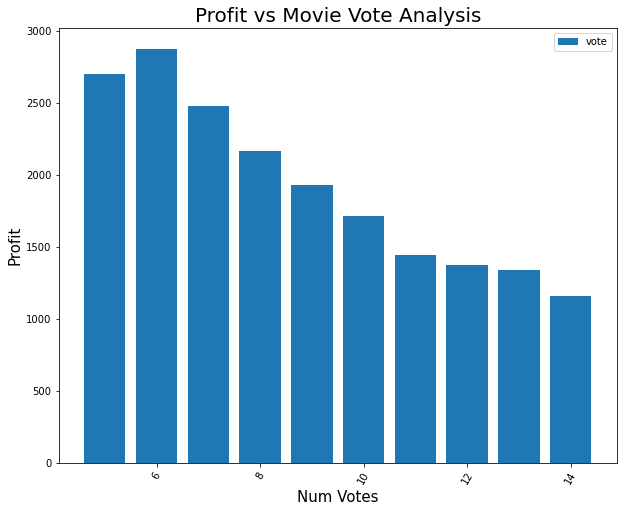

In [253]:
vote_count_figure, ax = plt.subplots(figsize=(10, 8))
plt.bar( x=vote_count_list, height= Number, label = "vote")
plt.xlabel('Num Votes', fontdict={'color':'black',  'size':15})
plt.xticks(rotation = '60')
plt.ylabel('Profit',fontdict={'color':'black', 'size':15})
plt.title('Profit vs Movie Vote Analysis', fontsize =20)
plt.legend()
plt.show();

The mean votes will determine how the movie studio relates with the parent company which is Microsft.